Importing required libraries

In [1]:
## Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Reading dataset
df=pd.read_csv('day.csv')

In [4]:
# Check the head of the dataset
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

Inspecting Dataset

In [5]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
(730, 16)


There are 730 rows and 16 columns in our dataset and none of the columns have null values.

In [6]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [7]:
# Inspecting unique values in each column
df.nunique().sort_values(ascending=True)

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

We can say from above that the columns 'yr','holiday','workingday','weathersit','season','weekday','month' are all categorical variables and should be dealth accordingly.

## Dropping unnecessary columns

In [8]:
df.drop(['instant','dteday','casual','registered','temp'],axis=1,inplace=True)
df.head()


season  yr  mnth  holiday  weekday  workingday  weathersit     atemp  \
0       1   0     1        0        6           0           2  18.18125   
1       1   0     1        0        0           0           2  17.68695   
2       1   0     1        0        1           1           1   9.47025   
3       1   0     1        0        2           1           1  10.60610   
4       1   0     1        0        3           1           1  11.46350   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

In [9]:
print(df.shape)

(730, 11)


After dropping unnecessay columns we are left with 11 columns

### Mapping categorcal variables like 'season','weathersit','month','weekday' to its respective data value so that we can create dummy variables later

In [10]:
df.season.replace({1:'spring',2:'summer',3:'fall', 4: 'winter'},inplace=True)
df.mnth.replace({1:'Jan',2:'Feb',3:'Mar',4 :'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
df.weekday.replace({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'},inplace=True)
df.weathersit.replace({1:'Clear',2:'Mist',3:'Lightsnow',4:'Heavyrain'},inplace=True)
df.head()

season  yr mnth  holiday weekday  workingday weathersit     atemp      hum  \
0  spring   0  Jan        0     Sat           0       Mist  18.18125  80.5833   
1  spring   0  Jan        0     Sun           0       Mist  17.68695  69.6087   
2  spring   0  Jan        0     Mon           1      Clear   9.47025  43.7273   
3  spring   0  Jan        0     Tue           1      Clear  10.60610  59.0435   
4  spring   0  Jan        0     Wed           1      Clear  11.46350  43.6957   

   windspeed   cnt  
0  10.749882   985  
1  16.652113   801  
2  16.636703  1349  
3  10.739832  1562  
4  12.522300  1600

### Visualising only numerical variables and not binary categorical variables

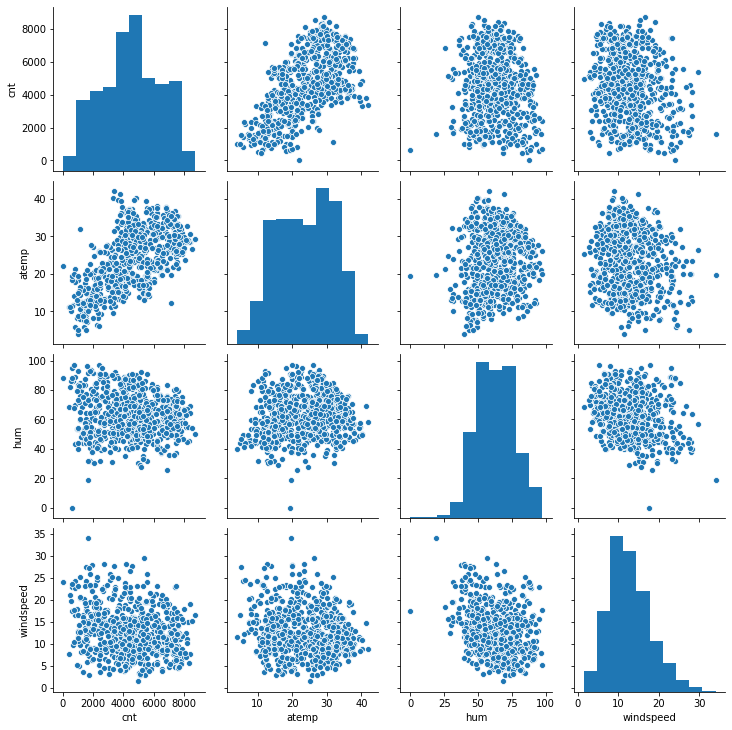

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
num_vars=['cnt','atemp','hum','windspeed']
sns.pairplot(df[num_vars])
plt.show()

From the pairplot above we can say that their exists a linear relationship between 'atemp' and target variable 'cnt

## Visualisation of categorical variables

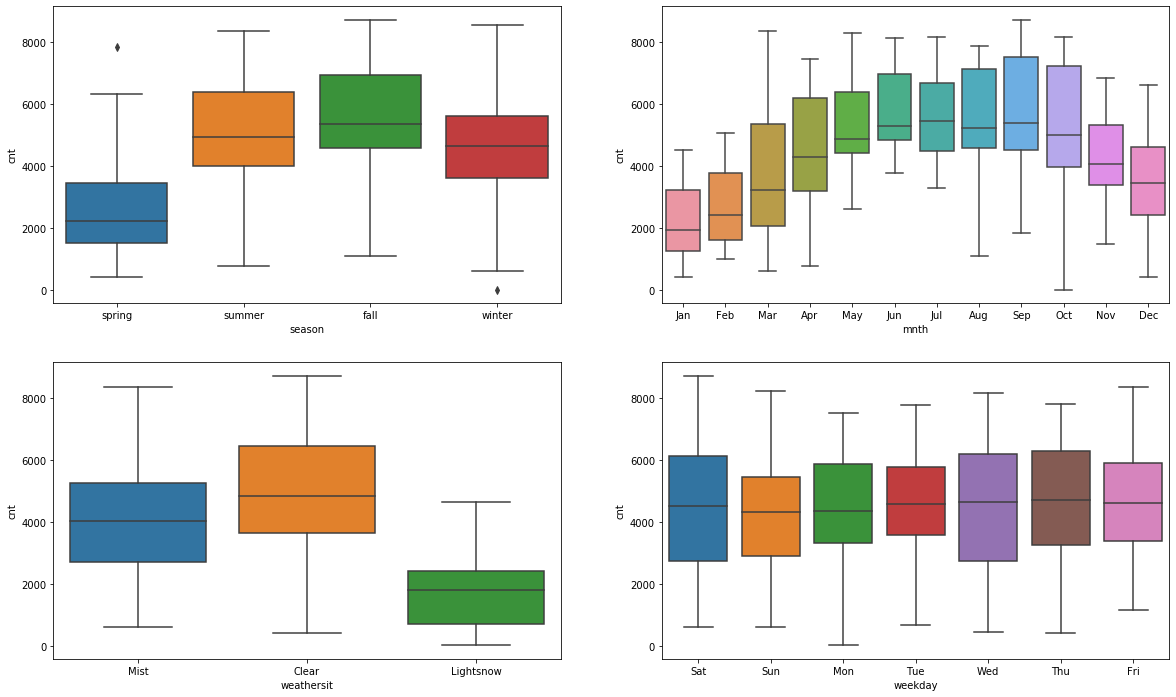

In [12]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.show()

1. Demand is high during Fall Season followed by summer and winter, Spring season has lowest demand
2. September month has the highest demand followed by October and August while January and Febrauary has the lowest demand,        Demand steadily increase from January till June
3. Demand is high during clear weather as expected
4. Median of Demand is almost same across all days but saturday and wednesday sees the most spread in demand

In [13]:
## Checking correlation between variables
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

We can say that 'atemp' and 'yr' seems to be most correlated with 'cnt'

## Creating Dummy for the variables such as Season, Month, Weekday, Weathersit

In [14]:
dummy1=pd.get_dummies(df['season'],drop_first=True)
dummy2=pd.get_dummies(df['mnth'],drop_first=True)
dummy3=pd.get_dummies(df['weekday'],drop_first=True)
dummy4=pd.get_dummies(df['weathersit'],drop_first=True)


In [15]:
## Adding dummies to our dataset
df = pd.concat([df,dummy1,dummy2,dummy3,dummy4], axis = 1)
df.head()

season  yr mnth  holiday weekday  workingday weathersit     atemp      hum  \
0  spring   0  Jan        0     Sat           0       Mist  18.18125  80.5833   
1  spring   0  Jan        0     Sun           0       Mist  17.68695  69.6087   
2  spring   0  Jan        0     Mon           1      Clear   9.47025  43.7273   
3  spring   0  Jan        0     Tue           1      Clear  10.60610  59.0435   
4  spring   0  Jan        0     Wed           1      Clear  11.46350  43.6957   

   windspeed  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  Lightsnow  Mist  
0  10.749882  ...    0    0    0    1    0    0    0    0          0     1  
1  16.652113  ...    0    0    0    0    1    0    0    0          0     1  
2  16.636703  ...    0    0    1    0    0    0    0    0          0     0  
3  10.739832  ...    0    0    0    0    0    0    1    0          0     0  
4  12.522300  ...    0    0    0    0    0    0    0    1          0     0  

[5 rows x 33 columns]

In [16]:
df.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
df.head()

yr  holiday  workingday     atemp      hum  windspeed   cnt  spring  \
0   0        0           0  18.18125  80.5833  10.749882   985       1   
1   0        0           0  17.68695  69.6087  16.652113   801       1   
2   0        0           1   9.47025  43.7273  16.636703  1349       1   
3   0        0           1  10.60610  59.0435  10.739832  1562       1   
4   0        0           1  11.46350  43.6957  12.522300  1600       1   

   summer  winter  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  Lightsnow  \
0       0       0  ...    0    0    0    1    0    0    0    0          0   
1       0       0  ...    0    0    0    0    1    0    0    0          0   
2       0       0  ...    0    0    1    0    0    0    0    0          0   
3       0       0  ...    0    0    0    0    0    0    1    0          0   
4       0       0  ...    0    0    0    0    0    0    0    1          0   

   Mist  
0     1  
1     1  
2     0  
3     0  
4     0  

[5 rows x 29 columns]

### Splitting the data into train and test dataset

In [17]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

### Scaling 'atemp','hum','windspeed' features

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [19]:
num_vars=['atemp','hum','windspeed']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [20]:
df_train.head()

yr  holiday  workingday     atemp       hum  windspeed   cnt  spring  \
653   1        0           1  0.501133  0.575354   0.300794  7534       0   
576   1        0           1  0.766351  0.725633   0.264686  7216       0   
426   1        0           0  0.438975  0.640189   0.255342  4066       1   
728   1        0           0  0.200348  0.498067   0.663106  1796       1   
482   1        0           0  0.391735  0.504508   0.188475  4220       0   

     summer  winter  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  Lightsnow  \
653       0       1  ...    1    0    0    0    0    0    1    0          0   
576       0       0  ...    0    0    0    0    0    0    1    0          0   
426       0       0  ...    0    0    0    1    0    0    0    0          0   
728       0       0  ...    0    0    0    0    1    0    0    0          0   
482       1       0  ...    0    0    0    1    0    0    0    0          0   

     Mist  
653     0  
576     0  
426     1  
728     0  
482     1  

[5 rows x 29 columns]

### Dividing into X and Y sets for model building

In [21]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model using RFE

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [23]:
## selecting 15 best features using RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train,y_train)

In [24]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 7),
 ('Mar', False, 14),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 13),
 ('Lightsnow', True, 1),
 ('Mist', True, 1)]

In [25]:
## columns selected after RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'Dec',
       'Jan', 'Jul', 'Nov', 'Sep', 'Sat', 'Lightsnow', 'Mist'],
      dtype='object')

## Building model using statsmodel for detailed analysis

In [26]:
X_train_rfe = X_train[col]

In [27]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe).fit()

In [28]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          9.67e-187
Time:                        16:35:23   Log-Likelihood:                -4116.9
No. Observations:                 510   AIC:                             8266.
Df Residuals:                     494   BIC:                             8334.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3204.7688    278.590     11.504      0.0

From the P value we can say that Sat is insignificant and hence can be dropped

In [29]:
X_train_new = X_train_rfe.drop(["Sat"], axis = 1)

Rebuilding the model without Sat

In [30]:
X_train_lm = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_lm).fit()

In [31]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          2.58e-187
Time:                        16:35:27   Log-Likelihood:                -4118.3
No. Observations:                 510   AIC:                             8267.
Df Residuals:                     495   BIC:                             8330.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3241.9087    278.114     11.657      0.0

Both the R square and Adjusted R square value remained unchanged

In [32]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Lightsnow', 'Mist'],
      dtype='object')

In [33]:
X_train_lm = X_train_lm.drop(['const'], axis=1)

In [34]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3         hum  25.08
2       atemp  16.83
4   windspeed   4.00
6      winter   2.93
5      spring   2.89
13       Mist   2.26
0          yr   2.06
10        Nov   1.82
8         Jan   1.75
7         Dec   1.54
9         Jul   1.40
12  Lightsnow   1.25
11        Sep   1.22
1     holiday   1.06

We can see the VIF value of hum,atemp,windspeed is very high so we drop the variable one by one

In [35]:
## rebuilding the model by dropping 'hum' variable
X_train_lm = X_train_lm.drop(["hum"], axis = 1)

In [36]:
X_train_lm = sm.add_constant(X_train_lm)
lm3 = sm.OLS(y_train,X_train_lm).fit()

In [37]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          3.95e-185
Time:                        16:35:32   Log-Likelihood:                -4126.3
No. Observations:                 510   AIC:                             8281.
Df Residuals:                     496   BIC:                             8340.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2569.6203    223.560     11.494      0.0

R squared  and  adjusted r squared decreases marginally

In [38]:
X_train_lm = X_train_lm.drop(['const'], axis=1)

In [39]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2       atemp  4.57
3   windspeed  3.95
5      winter  2.55
4      spring  2.35
0          yr  2.06
9         Nov  1.80
7         Jan  1.65
12       Mist  1.53
6         Dec  1.46
8         Jul  1.35
10        Sep  1.21
11  Lightsnow  1.09
1     holiday  1.06

VIF value of atemp variable is high but we are not dropping atemp variable as from pairplot we have observed it has a linear relationship with cnt variable and it is also a signifivant variable and instead we are dropping windspeed variable

In [40]:
X_train_lm = X_train_lm.drop(["windspeed"], axis = 1)

In [41]:
X_train_lm = sm.add_constant(X_train_lm)
lm4 = sm.OLS(y_train,X_train_lm).fit()

In [42]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.4
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          7.57e-180
Time:                        16:35:36   Log-Likelihood:                -4141.6
No. Observations:                 510   AIC:                             8309.
Df Residuals:                     497   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1965.4483    200.903      9.783      0.0

Both the R square and adjusted r squared value decreased.

In [43]:
X_train_lm = X_train_lm.drop(['const'], axis=1)

In [44]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2       atemp  3.05
4      winter  2.52
0          yr  2.05
3      spring  1.93
8         Nov  1.78
6         Jan  1.65
11       Mist  1.52
5         Dec  1.46
7         Jul  1.33
9         Sep  1.20
10  Lightsnow  1.07
1     holiday  1.06

Dropping Winter variable as it has high VIF.

In [45]:
X_train_lm = X_train_lm.drop(["winter"], axis = 1)


In [46]:
X_train_lm = sm.add_constant(X_train_lm)
lm5 = sm.OLS(y_train,X_train_lm).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     204.0
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.74e-176
Time:                        16:35:39   Log-Likelihood:                -4152.3
No. Observations:                 510   AIC:                             8329.
Df Residuals:                     498   BIC:                             8379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2316.7796    189.746     12.210      0.0

Now, "Nov"  and "Dec " Variable has become in-significant, hence dropping the same one by one

In [47]:
X_train_lm = X_train_lm.drop(["Nov"], axis = 1)


In [48]:
X_train_lm = sm.add_constant(X_train_lm)
lm6 = sm.OLS(y_train,X_train_lm).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     224.7
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.22e-177
Time:                        16:35:41   Log-Likelihood:                -4152.4
No. Observations:                 510   AIC:                             8327.
Df Residuals:                     499   BIC:                             8373.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2281.5984    166.330     13.717      0.0

In [49]:
X_train_lm = X_train_lm.drop(["Dec"], axis = 1)


In [50]:
X_train_lm = sm.add_constant(X_train_lm)
lm7 = sm.OLS(y_train,X_train_lm).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     249.9
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          9.21e-179
Time:                        16:35:44   Log-Likelihood:                -4152.6
No. Observations:                 510   AIC:                             8325.
Df Residuals:                     500   BIC:                             8368.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2241.8075    154.517     14.508      0.0

In [51]:
#Dropping Jan Variable as p value is slightly higher than 0.05.

X_train_lm = X_train_lm.drop(["Jan"], axis = 1)
X_train_lm = sm.add_constant(X_train_lm)
lm8 = sm.OLS(y_train,X_train_lm).fit()
print(lm8.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.2
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          3.48e-179
Time:                        16:35:45   Log-Likelihood:                -4154.5
No. Observations:                 510   AIC:                             8327.
Df Residuals:                     501   BIC:                             8365.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2193.3512    152.914     14.344      0.0

In [52]:
X_train_lm = X_train_lm.drop(['const'], axis=1)

In [53]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2      atemp  2.87
0         yr  2.01
7       Mist  1.47
4        Jul  1.29
3     spring  1.20
5        Sep  1.18
1    holiday  1.03
6  Lightsnow  1.03

Apart from Atemp, all Variables have agreable VIF's

## Residual analysis of Train Data

Both P-values & VIF values are in agreable range , except for atemp. However we cannot drop atemp variable as mentioned above.

In [54]:
X_train_lm = sm.add_constant(X_train_lm)
y_train_pred = lm8.predict(X_train_lm)


In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 
plt.show()

From above we can observe that error terms are normaly distributed with Mean Zero.

## Making Predictions for Test Data.

First we have to scale the variables in the test data .

In [56]:
num_vars=['atemp','hum','windspeed']
df_test[num_vars]=scaler.transform(df_test[num_vars])


In [57]:
df_test.describe()


yr     holiday  workingday       atemp         hum   windspeed  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.698630    0.532991    0.638508    0.313350   
std      0.500722    0.188034    0.459904    0.217888    0.148974    0.159947   
min      0.000000    0.000000    0.000000    0.025950    0.261915   -0.042808   
25%      0.000000    0.000000    0.000000    0.344751    0.527265    0.198517   
50%      0.000000    0.000000    1.000000    0.549198    0.627737    0.299459   
75%      1.000000    0.000000    1.000000    0.714132    0.743928    0.403048   
max      1.000000    1.000000    1.000000    0.980934    1.002146    0.807474   

               cnt      spring      summer      winter  ...         Oct  \
count   219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean   4546.981735    0.255708    0.264840    0.232877  ...    0.082192   
std    1898.633630    0.437258    0.442259    0.423633  ...    0.275286   
min     441.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%    3303.500000    0.000000    0.000000    0.000000  ...    0.000000   
50%    4579.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%    5869.500000    1.000000    1.000000    0.000000  ...    0.000000   
max    8395.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sep         Mon         Sat         Sun         Thu         Tue  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.086758    0.127854    0.118721    0.146119    0.164384    0.164384   
std      0.282125    0.334692    0.324202    0.354034    0.371472    0.371472   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Wed   Lightsnow        Mist  
count  219.000000  219.000000  219.000000  
mean     0.100457    0.027397    0.319635  
std      0.301297    0.163612    0.467403  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 29 columns]

In [58]:
# Dividing in to X Test & Y test
y_test=df_test.pop("cnt")
X_test=df_test

In [59]:
#Adding Constant variable to test Data frame
X_test_lm=sm.add_constant(X_test)

In [60]:
 
X_test.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'Lightsnow', 'Mist'],
      dtype='object')

In [61]:
# Creating X_test_lm by dropping variables 
X_test_lm=X_test_lm.drop(["workingday","hum","summer","winter","Jan","Aug","Dec","Feb","Jun","Mar","May","Nov","Oct","Sat","Mon","Sun","Thu","Tue","Wed","windspeed"],axis=1)

In [62]:
X_test_lm.columns

Index(['const', 'yr', 'holiday', 'atemp', 'spring', 'Jul', 'Sep', 'Lightsnow',
       'Mist'],
      dtype='object')

In [63]:
#Making Predictions with final Model.

y_test_pred=lm8.predict(X_test_lm)


Model Evaluation:

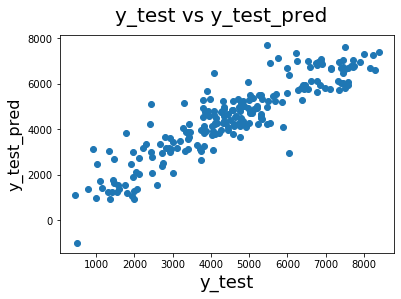

In [64]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)  
plt.show()

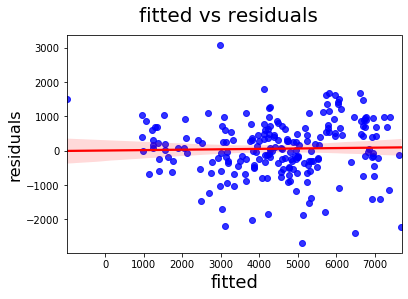

In [66]:
fig = plt.figure()
#plt.scatter(y_test, y_test-y_test_pred)
sns.regplot(x=y_test_pred, y=y_test-y_test_pred, data=None, scatter=True,scatter_kws={"color":"blue"},line_kws={"color":"red"})
fig.suptitle('fitted vs residuals', fontsize = 20)             
plt.xlabel('fitted', fontsize = 18)                          
plt.ylabel('residuals', fontsize = 16)  
plt.show()


From above we can see that residuals do not follow any particular pattern and  around a mean of 0.

In [204]:
#Calculating R2 for Test dataset

In [67]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test,y_test_pred)
r_squared

0.8055831288954963

In [81]:
adjusted_r2 = 1- ((1-r_squared)*(len(X_test)-1)/(len(X_test)-8-1))
adjusted_r2
                 

0.7981767719010391

R2 square for Train dataset is 0.817 whilst for the test dataset is 0.8055 .Adjusted R2 for Train is 0.814, for Test is 0.7981 . We can confirm that the model explains 80 % of the variance of dependent variable 'cnt'. 

In [82]:
lm8.params

const        2193.351187
yr           2041.902360
holiday      -793.293095
atemp        3716.177944
spring      -1302.350554
Jul          -586.716647
Sep           570.691180
Lightsnow   -2495.440081
Mist         -702.458164
dtype: float64

Equation of our best fitted line is :

cnt= 2193.35 + 2041.9 X yr -793.2 X holiday +3716.1 X atemp  -1302.35 X spring -586.7 X Jul + 570.69 X Sep - 2495.44 X Lightsnow -702.45 X Mist

Observations :
1. We have finalized the model based on 8 Variables.
2. We can clearly see that temperature plays a huge role for increase of demand.
3. Also, Month September has highest demand.
4. Climate of Lightsnow is not favourable by customers.